In [18]:
# import libraries as necessary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
from tensorflow.keras import layers, models
import seaborn as sns

In [4]:
# Define the path where your dataset is stored
dataset_path = "data"
categories = os.listdir(dataset_path)  # List folder names (tumor types)
# print(categories)
data = []
labels = []

['glioma', 'meningioma', 'notumor', 'pituitary']


In [6]:
# Loop over each folder and load the images
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = load_img(img_path, target_size=(128, 128))  # Resize all images to the same size
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(category)  # Append the folder name as the label

data = np.array(data) / 255.0  # Normalize the images
labels = np.array(labels)

# Encode the labels (to numeric form)

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

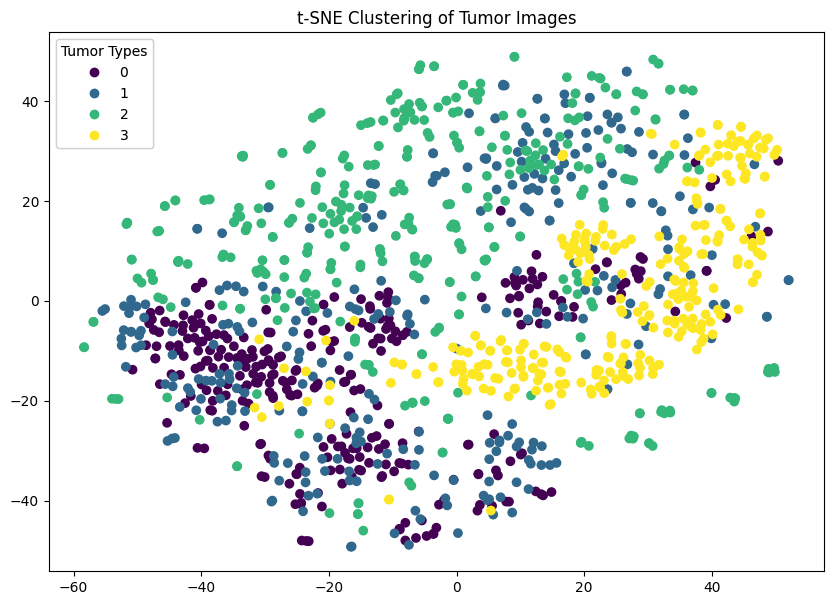

In [9]:


# Flatten images for t-SNE
data_flat = data.reshape(len(data), -1)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_flat)

# Plot the results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')

# Automatically create a legend from unique colors (for clusters)
legend1 = plt.legend(*scatter.legend_elements(), title="Tumor Types")
plt.gca().add_artist(legend1)

plt.title("t-SNE Clustering of Tumor Images")
plt.show()

In [12]:
import tensorflow as tf


# Create CNN model
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Explicitly defining input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(categories), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the CNN
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.3151 - loss: 1.6869 - val_accuracy: 0.6654 - val_loss: 0.8630
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7155 - loss: 0.7250 - val_accuracy: 0.7452 - val_loss: 0.6343
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8132 - loss: 0.4478 - val_accuracy: 0.7757 - val_loss: 0.5709
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8859 - loss: 0.3005 - val_accuracy: 0.7947 - val_loss: 0.7034
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9298 - loss: 0.1973 - val_accuracy: 0.8365 - val_loss: 0.4886
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9634 - loss: 0.1041 - val_accuracy: 0.8441 - val_loss: 0.5825
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - accuracy: 0.9727 - loss: 0.0773 - val_accuracy: 0.7833 - val_loss: 0.7089
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 260ms/step - accuracy: 0.9724 - loss: 0.1001 - val_accuracy: 0.8327

In [16]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices



# Accuracy and F2-score for each class
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, digits=4)
print(report)

# For specific F2-score
precision, recall, f2_score, support = precision_recall_fscore_support(
    y_test, y_pred, beta=2, average=None  # Set beta=2 for F2-score, average=None for per-class
)

# Display F2-score for each class
for i, label in enumerate(label_encoder.classes_):
    print(f"Class: {label}, F2-Score: {f2_score[i]:.4f}, Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

      glioma     0.8000    0.7869    0.7934        61
  meningioma     0.7292    0.5833    0.6481        60
     notumor     0.9359    0.9125    0.9241        80
   pituitary     0.7922    0.9839    0.8777        62

    accuracy                         0.8251       263
   macro avg     0.8143    0.8166    0.8108       263
weighted avg     0.8233    0.8251    0.8199       263

Class: glioma, F2-Score: 0.7895, Precision: 0.8000, Recall: 0.7869
Class: meningioma, F2-Score: 0.6076, Precision: 0.7292, Recall: 0.5833
Class: notumor, F2-Score: 0.9171, Precision: 0.9359, Recall: 0.9125
Class: pituitary, F2-Score: 0.9385, Precision: 0.7922, Recall: 0.9839


In [17]:
import numpy as np


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Per-class accuracy calculation
per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Display accuracy for each class
for i, label in enumerate(label_encoder.classes_):
    print(f"Class: {label}, Accuracy: {per_class_accuracy[i]:.4f}")

Class: glioma, Accuracy: 0.7869
Class: meningioma, Accuracy: 0.5833
Class: notumor, Accuracy: 0.9125
Class: pituitary, Accuracy: 0.9839


In [19]:
class_labels = np.unique(label_encoder.classes_)

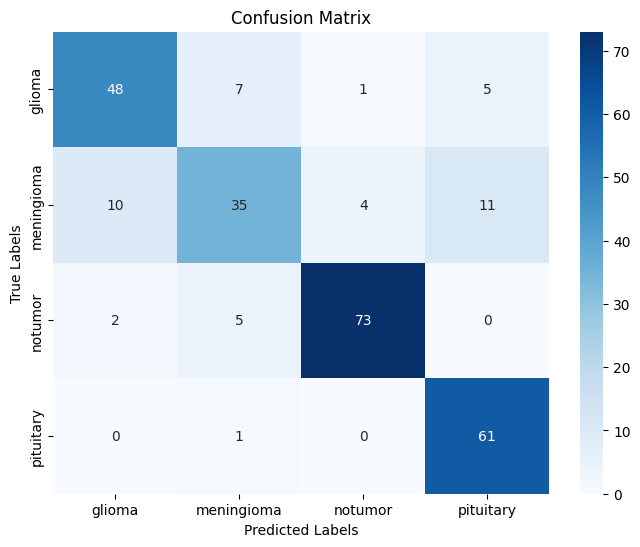

In [21]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()